In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import nltk

nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thiru\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thiru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thiru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet

from nltk.stem import  WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')


In [23]:
trump = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [24]:
biden = pd.read_csv('hashtag_joebiden.csv', lineterminator='\n')
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [25]:
trump.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [26]:
trump.shape

(970919, 21)

In [27]:
biden.shape

(776886, 21)

In [28]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [29]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [33]:
970919 + 776886

1747805

In [36]:
trump['candidate'] = 'trump'
biden['candidate'] = 'biden'
data = pd.concat([trump,biden])
data.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at', 'candidate'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747805 entries, 0 to 776885
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   created_at            object 
 1   tweet_id              float64
 2   tweet                 object 
 3   likes                 float64
 4   retweet_count         float64
 5   source                object 
 6   user_id               float64
 7   user_name             object 
 8   user_screen_name      object 
 9   user_description      object 
 10  user_join_date        object 
 11  user_followers_count  float64
 12  user_location         object 
 13  lat                   float64
 14  long                  float64
 15  city                  object 
 16  country               object 
 17  continent             object 
 18  state                 object 
 19  state_code            object 
 20  collected_at          object 
 21  candidate             object 
dtypes: float64(7), object(15)
memory usage: 306.7+ M

In [40]:
data['country'].value_counts()

country
United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: count, Length: 189, dtype: int64

In [41]:
data['country'] = data['country'].replace({'United States of America': 'US', 'United States' : 'US'}) 

In [42]:
data['country'].value_counts()

country
US                          394400
United Kingdom               58051
India                        40091
Germany                      35379
France                       35299
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: count, Length: 188, dtype: int64

In [43]:
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()
tweets_count

,candidate,tweet
0,biden,776886
1,trump,970919


In [44]:
likes_comparision = data.groupby('candidate')['likes'].sum().reset_index()
likes_comparision

,candidate,likes
0,biden,7894066.0
1,trump,7259572.0


In [47]:
fig = px.bar(likes_comparision, x= 'candidate', y='likes', color= 'candidate',
             color_discrete_map = {'Trump':'blue', 'Biden': 'Green'},
             labels = {'candidate': 'Candidate', 'likes': 'Total Likes'},
             title='Comparision of Likes')
fig

In [10]:
def clean(text):
    text = re.sub(r'https?://\S+|www\.\S+','', str(text))

    text = text.lower()

    text = re.sub('[^a-z]', ' ', text)

    text = text.split()

    lm = WordNetLemmatizer()

    text = [lm.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]

    text = ' '.join(word for word in text)

    return text


In [11]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else :
        return 'positive'

In [18]:
trump_tweets = data[data['candidate']=='trump']

trump_tweets =trump_tweets.loc[trump_tweets.country == 'US']
trump_tweets = trump_tweets[['tweet']]
trump_tweets.head()

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
2,"#Trump: As a student I used to hear for years,..."
4,You get a tie! And you get a tie! #Trump ‘s ra...
5,@CLady62 Her 15 minutes were over long time ag...
7,@DeeviousDenise @realDonaldTrump @nypost There...


In [19]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
trump_tweets.head()

,tweet,cleantext
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...


In [20]:
trump_tweets.to_pickle("trump_tweets.pkl")

In [57]:
data.to_pickle('data.pkl')

In [8]:
data = pd.read_pickle('data.pkl')
data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump


In [22]:
trump_tweets = pd.read_pickle('trump_tweets.pkl')

In [23]:
trump_tweets.head()

,tweet,cleantext
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...


In [12]:
biden_tweets = data[data['candidate']=='biden']

biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets = biden_tweets[['tweet']]
biden_tweets.head()

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...
4,#censorship #HunterBiden #Biden #BidenEmails #...
6,"In 2020, #NYPost is being #censorship #CENSORE..."
11,"FBI Allegedly Obtained Hunter Biden Computer, ..."


In [ ]:
biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)

In [14]:
biden_tweets

,tweet,cleantext
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...
...,...,...
776861,#election #2020Elections #trump #biden https:/...,election election trump biden
776862,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,gop gopleader senatemajldr lindseygrahamsc tak...
776865,@FLOTUS I’m excited to have a FLOTUS whose vag...,flotus excited flotus whose vagina seen twitte...
776870,The man needs some help...#usa #biden\nWhen wi...,man need help usa biden go


In [15]:
biden_tweets.to_pickle("biden_tweets.pkl")

In [16]:
biden_tweets= pd.read_pickle('biden_tweets.pkl')

In [17]:
biden_tweets.head()

,tweet,cleantext
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...


In [24]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [25]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [27]:
trump_tweets['Analysis'] = trump_tweets['polarity'].apply(getAnalysis)

In [28]:
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,Analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,0.416667,-0.108333,negative
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.533333,0.050000,positive


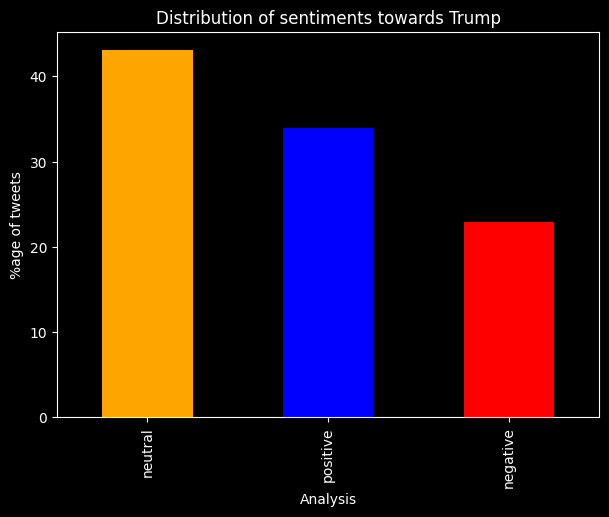

In [ ]:
plt.style.use('dark_background')

colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7,5))
(trump_tweets.Analysis.value_counts(normalize=True)*100).plot.bar(color=colors)
plt.ylabel('%age of tweets')
plt.title('Distribution of sentiments towards Trump')
plt.show()

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

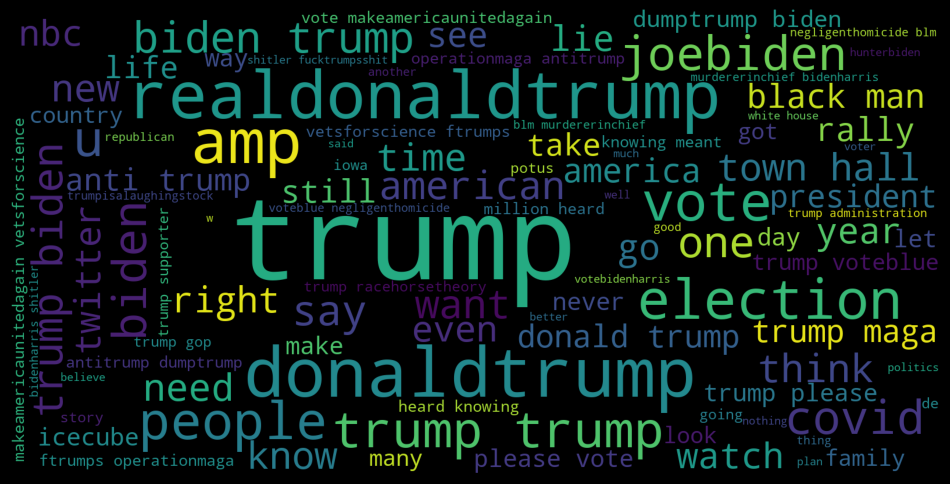

In [38]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(wd_list)
    wordcloud = WordCloud(background_color='black', 
                          stopwords=stopwords,
                          width=1600, height=800, max_words=100, max_font_size=200,
                          colormap='viridis').generate(all_words)
    plt.figure(figsize=(12,10))
    plt.axis('off')
    plt.imshow(wordcloud)

word_cloud(trump_tweets['cleantext'][:5000])

joeBiden's Analysis

In [39]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['Analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,Analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.00000,neutral
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...,0.000000,0.00000,neutral
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...,0.000000,0.00000,neutral
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.14881,negative
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...,0.100000,-0.10000,negative


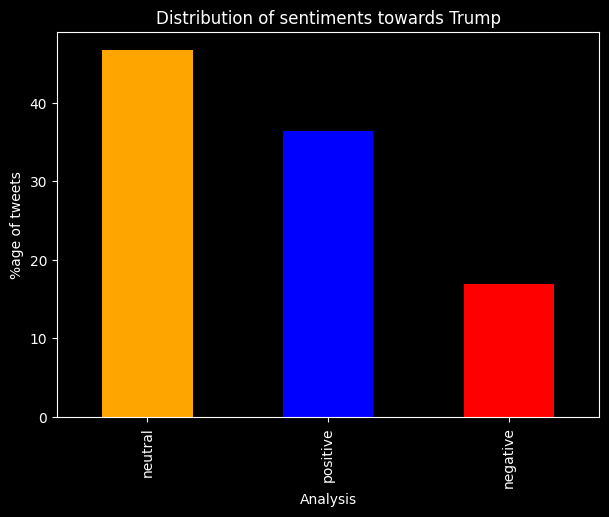

In [40]:
plt.style.use('dark_background')

colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7,5))
(biden_tweets.Analysis.value_counts(normalize=True)*100).plot.bar(color=colors)
plt.ylabel('%age of tweets')
plt.title('Distribution of sentiments towards Trump')
plt.show()

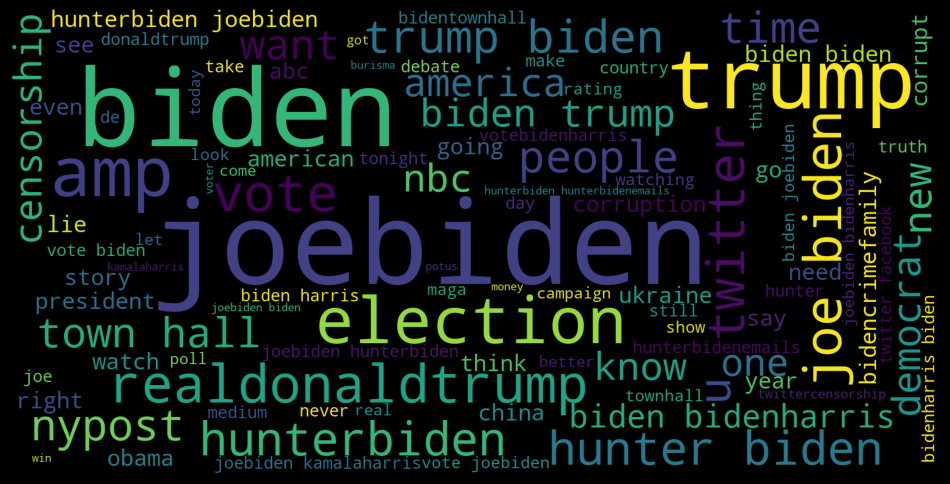

In [41]:
word_cloud(biden_tweets['cleantext'][:5000])

In [42]:
biden_tweets.Analysis.value_counts(normalize=True)*100

Analysis
neutral     46.718230
positive    36.397865
negative    16.883906
Name: proportion, dtype: float64

In [43]:
trump_tweets.Analysis.value_counts(normalize=True)*100

Analysis
neutral     43.091394
positive    33.959477
negative    22.949129
Name: proportion, dtype: float64

# conclusion

### Our sentiment analysis on tweets about Biden and Trump reveals key differences in public perception:

1. Neutral sentiment dominates both datasets, with Biden's tweets being slightly more neutral (46.72%) compared to Trump's (43.09%).
2. Biden receives more positive sentiment (36.40%) than Trump (33.96%), indicating a generally more favorable public tone towards him.
3. Trump’s tweets have a higher negative sentiment (22.95%), significantly more than Biden's (16.88%), suggesting stronger criticism or opposition.

🔹 Key Takeaways:
1. Public opinion on both candidates is mostly neutral, meaning many tweets are factual, news-related, or lack strong emotional bias.
2. Biden's sentiment leans more positive and neutral, while Trump has a higher share of negative sentiment.
3. These insights could be further explored by analyzing tweet trends over time, geographic sentiment distribution, or word clouds to see what topics drive each sentiment.